In [1]:
%matplotlib inline
from event import Event, iet
import matplotlib.pyplot as plt
import numpy as np


number of events detected: (1975, 7)


In [2]:
iet.df.index.values

array([   0,    1,    2, ..., 1972, 1973, 1974])

(<Figure size 1080x2160 with 12 Axes>,
 array([<AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>,
        <AxesSubplot:ylabel='Pressure (Pa)'>], dtype=object))

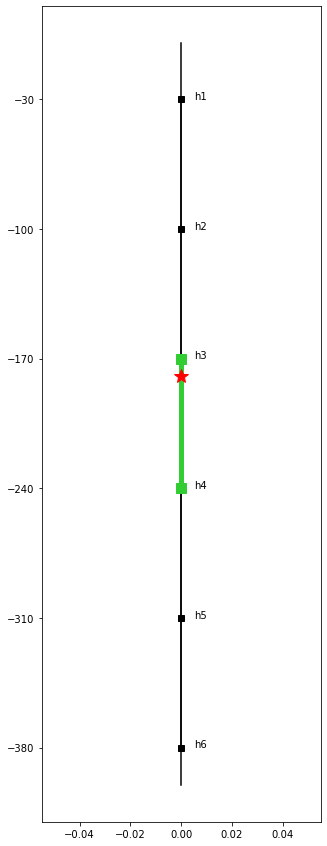

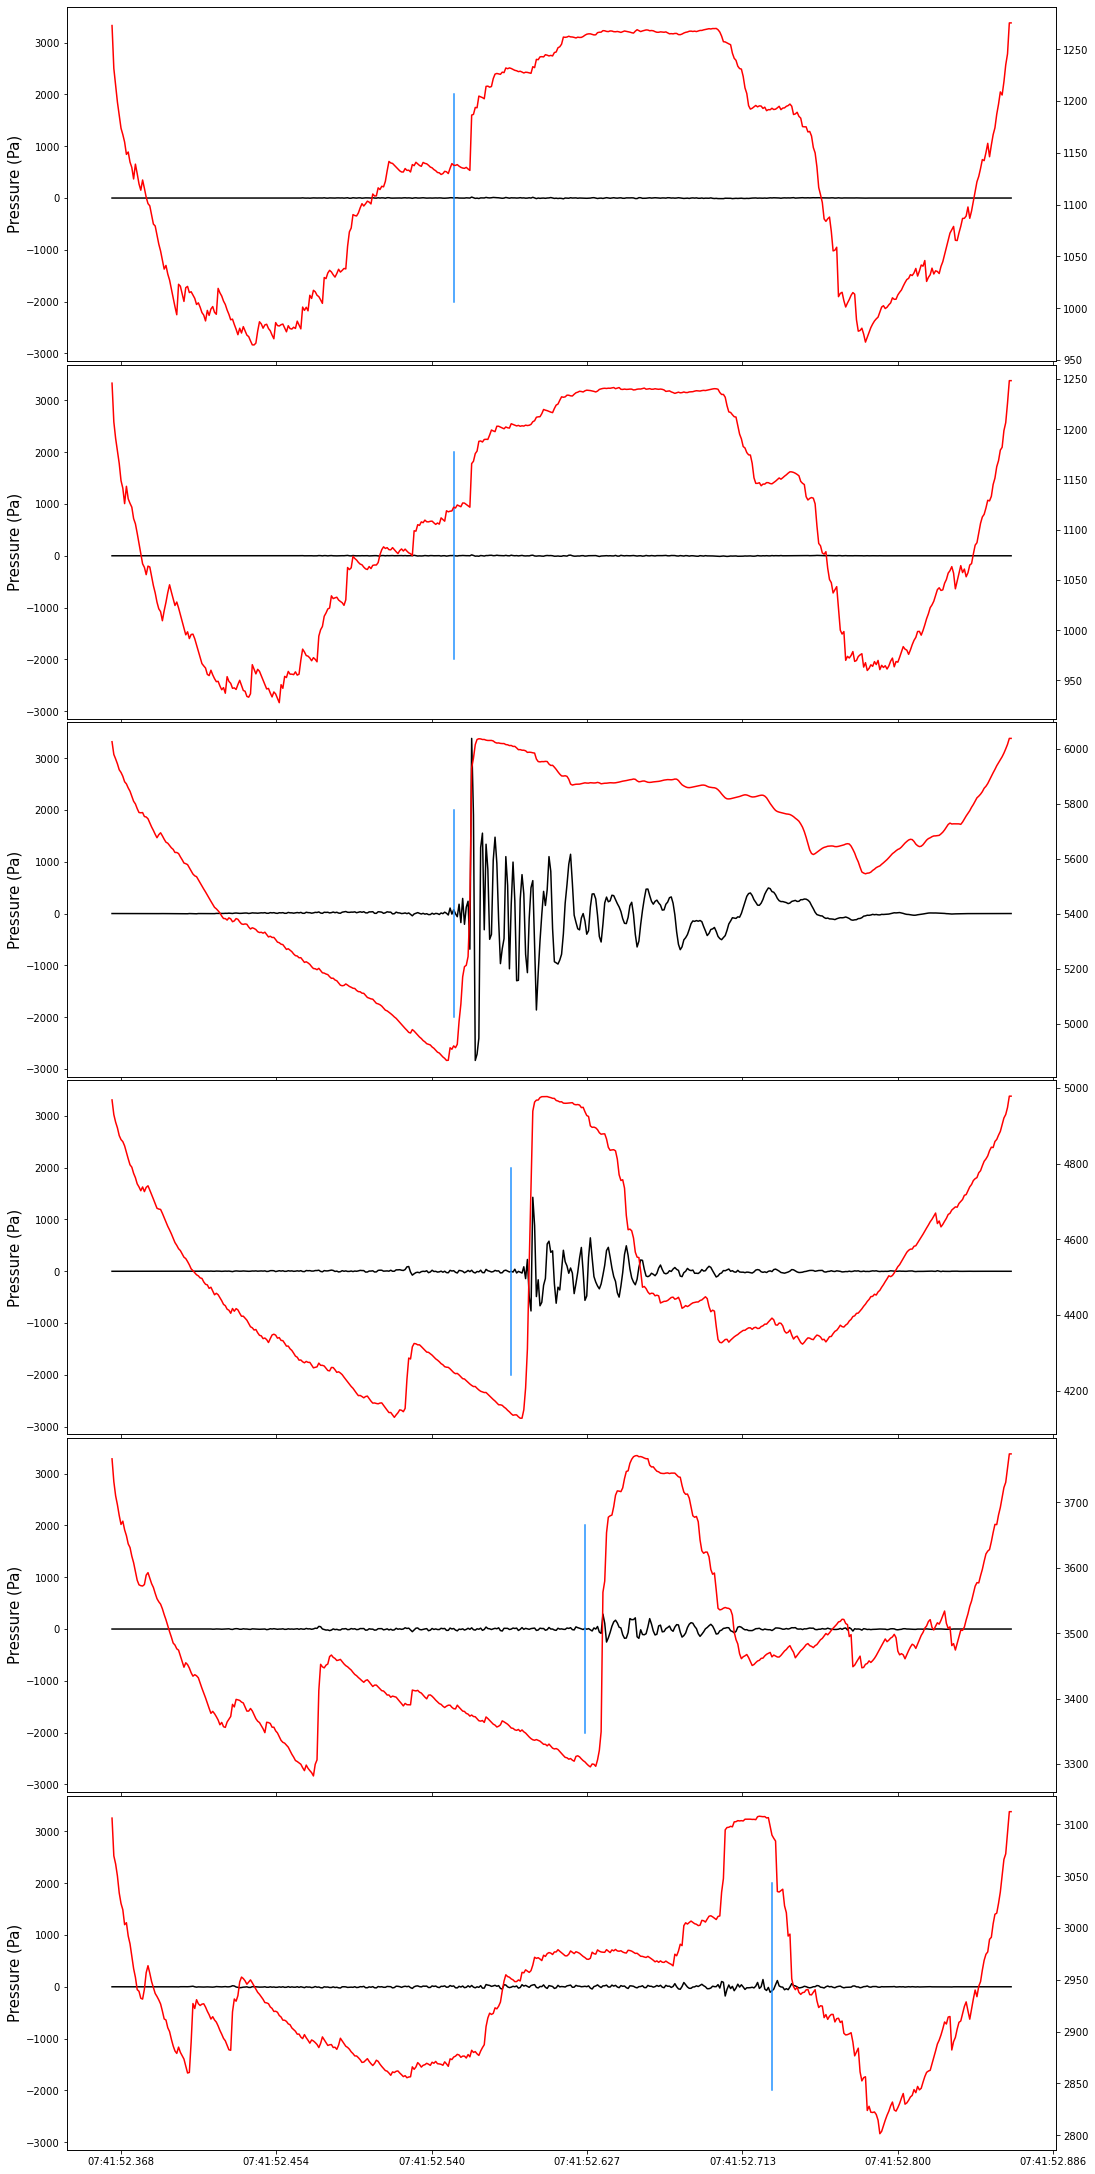

In [3]:
e = Event(id=140)
e.plot('event depth')
e.plot('waveforms')

In [4]:
# events = [Event(id=id) for id in iet.df.index]

In [5]:
!pip install multiprocess

You should consider upgrading via the '/home/john/anaconda3/envs/borehole/bin/python3.8 -m pip install --upgrade pip' command.


In [6]:
# from multiprocessing import Pool
from multiprocess import Pool

pool = Pool(9)

def get_depth(id):
    return Event(id=id).depth

depths = pool.map(get_depth, iet.df.index.values)

pool.close()

In [7]:
get_depth(id=iet.df.index.values[2])

171.4

In [8]:
# depths = [Event(id=id).depth for id in iet.df.index]
# depths = [e.depth for e in events]
iet.df['depth'] = depths

In [9]:
iet.df

,index,event_times (mpl),event_times (abs),hphone_idx,ones,event_times,p_arrival_hphone_idx,depth
0,0,18037.318174,2019-05-21T07:38:10.208000Z,h3,1,2019-05-21 07:38:10.208000+00:00,2019-05-21 07:38:10.186000+00:00,-16.6
1,1,18037.318189,2019-05-21T07:38:11.526000Z,h3,1,2019-05-21 07:38:11.526000+00:00,2019-05-21 07:38:11.517000+00:00,172.2
2,2,18037.318203,2019-05-21T07:38:12.754000Z,h3,1,2019-05-21 07:38:12.754000+00:00,2019-05-21 07:38:12.723000+00:00,171.4
3,3,18037.318219,2019-05-21T07:38:14.141000Z,h3,1,2019-05-21 07:38:14.141000+00:00,2019-05-21 07:38:14.107000+00:00,326.6
4,4,18037.318222,2019-05-21T07:38:14.405000Z,h3,1,2019-05-21 07:38:14.405000+00:00,2019-05-21 07:38:14.592000+00:00,203.4
...,...,...,...,...,...,...,...,...
1970,300,18037.359564,2019-05-21T08:37:46.291000Z,h6,1,2019-05-21 08:37:46.291000+00:00,2019-05-21 08:37:46.273000+00:00,382.2
1971,301,18037.359570,2019-05-21T08:37:46.891000Z,h6,1,2019-05-21 08:37:46.891000+00:00,2019-05-21 08:37:46.868000+00:00,383.0
1972,302,18037.359578,2019-05-21T08:37:47.564000Z,h6,1,2019-05-21 08:37:47.564000+00:00,2019-05-21 08:37:47.739000+00:00,383.0
1973,303,18037.359589,2019-05-21T08:37:48.513000Z,h6,1,2019-05-21 08:37:48.513000+00:00,2019-05-21 08:37:48.496000+00:00,383.8


[]

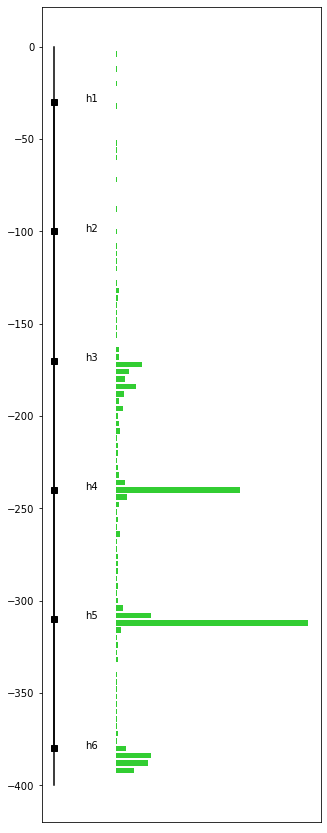

In [10]:

hydrophones = {'h1':{'depth':30, 'idx':0}
              ,'h2':{'depth':100, 'idx':1}
              ,'h3':{'depth':170, 'idx':2}
              ,'h4':{'depth':240, 'idx':3}
              ,'h5':{'depth':310, 'idx':4}
              ,'h6':{'depth':380, 'idx':5}}

x = np.zeros(6)
h_depths = -1 * np.array([hydrophones[h]['depth'] for h in hydrophones])

fig, ax = plt.subplots(figsize=(5, 15))

# plot hydrophone cable axis
ax.plot((0, 0), (0, -400), color='black')
ax.plot(x, h_depths, marker='s', color='black')

# ax.set_yticks(h_depths)

# make a label for each hydrophone
for n, h in enumerate(h_depths):
    ax.text(s='h{n}'.format(n=n+1), x=0.005, y=h)

h, e = np.histogram(iet.df.depth, bins=np.arange(0, 400, 4))

# ax2 = ax.twinx()
ax.barh(-e[:-1], width=h/(10*h.sum()), left=0.01, height=(3,)*h.shape[0], color='limegreen')

# ax.plot((-10, 10), (-150, -150))
ax.set_xticks([])

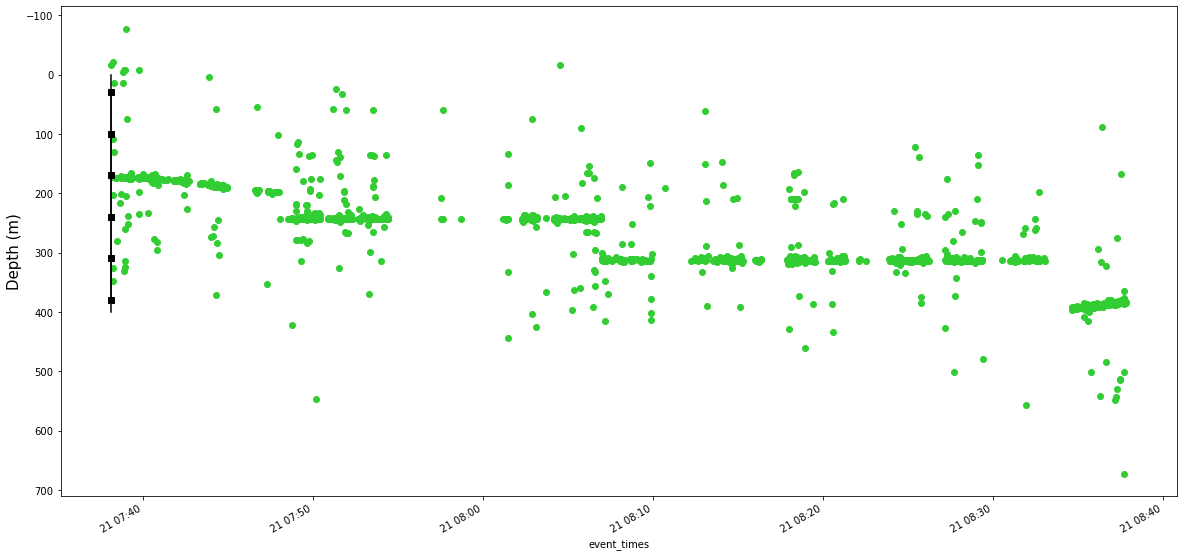

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
iet.df.set_index('event_times').depth.plot(ax=ax, color='limegreen', marker='o', linewidth=0)
ax.invert_yaxis()
ax.set_ylabel('Depth (m)', fontsize=15)

x = iet.df.event_times[0]
ax.plot((x, x), (0, 400), color='black')
ax.plot((x,)*6, -h_depths, marker='s', color='black')

In [12]:
# iet.df.event_times.diff().apply(lambda x: x.total_seconds()).hist()

In [13]:
# iet.df.event_times.diff().apply(lambda x: x.total_seconds())

In [14]:
# for id in np.arange(100, 1000, 10):
#     e = Event(id=id)
#     fig, ax = e.plot('event depth')
#     fig.savefig('figures/event{id}.pdf'.format(id=id), bbox_inches='tight')

In [15]:
# e.plot('waveforms')

In [16]:
# diffs = [np.diff(aic) for aic in e.aics]

# fig, ax = plt.subplots()
# for diff in diffs:
#     ax.plot(diff)
    
# maxes = [np.argmax(diff) for diff in diffs]

In [17]:
# fig, axes = e.plot('waveforms')

# for n, max in enumerate(maxes):
#     t = e.stream[n].times('matplotlib')
#     y = e.stream[n].data
#     t = t[max]
#     y = y[max]
#     axes[n].plot((t, t), (-2000, 2000), color='gold', linewidth=2)